# convolutions

In [1]:
# all import statements
import numpy as np
import pandas as pd
import pydicom as pyd
import os
import matplotlib.pyplot as plt
import mudicom

from os.path import dirname, join
from pydicom.data import get_testdata_files
from pydicom.filereader import read_dicomdir
from PIL import Image

from scipy.misc import imresize
from scipy.signal import convolve2d
import scipy
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

from numpy import newaxis

## Image Extract

In [2]:
PATH = 'data/stage_2_train_images/'

lstFilesDCM = []  
for dirName, subdirList, fileList in os.walk(PATH):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

len(lstFilesDCM)

dcm_40 = []
for img in range(40):
    dcm_40.append(lstFilesDCM[img])

dcm_np = []
pat_ids = []
for dcm in dcm_40:
    pat_ids.append(dcm.split('/')[2].split('.')[0])
    img = mudicom.load(dcm)
    img = img.image
    img = img.numpy
    dcm_np.append(img)


def show(img, title=None):
    plt.imshow(img, cmap=plt.cm.bone)
    if title is not None: plt.title = title

def plots(ims, figsize=(12,6), rows=2, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], cmap=plt.cm.bone)

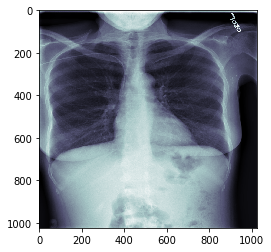

In [3]:
show(dcm_np[1])

## Convolutions

### Kernels

#### Identity Kernel

In [4]:
identity_k = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0]
])

#### Edge Detection Kernels

In [5]:
edge1_k = np.array([
    [1,0,-1],
    [0,0,0],
    [-1,0,1]
])

edge2_k = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])

edge3_k = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])

In [6]:
edgeall_k = np.array([
    [0,-1,0],
    [-1,4,-1],
    [0,-1,0]
])

edgeH_k = np.array([
    [0,0,0],
    [-1,2,-1],
    [0,0,0]
])

edgeV_k = np.array([
    [0,-1,0],
    [0,2,0],
    [0,-1,0]
])

#### Sharpness Kernel

In [7]:
sharp_k = np.array([
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
])

#### Gaussian Blur Kernel

In [8]:
gauss3_k = np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
])

gauss5_k = (1/256)*np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])

#### Box Blur kernel

In [9]:
boxblur_k = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

#### Unsharp Masking kernel

In [10]:
unsharpmask_k = (-1/256)*np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, -476, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])

#### Gradient Detection kernel

In [11]:
gradH_k = np.array([
    [-1, -1, -1],
    [0,0,0],
    [1,1,1]
])

gradV_k = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

#### Sobel Features kernel

Similar to gradient kernels approximating the smoothed gradient of the image in horizontal and vertical directions. 

Combination of gradient detection and a smoothing kernel

In [12]:
sobelH_k = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

sobelV_k = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

#### Emboss Kernel

In [13]:
emboss_k = np.array([
    [-2, -2, 0],
    [-2, 6, 0],
    [0, 0, 0]
])

## Convolution Outputs

### Convolution Function

In [31]:
def conv2d(img, kernel, name = None):
    img = img[newaxis, :, :]
    for x in range(len(img)):
        conv = convolve2d(img[x,:,:], kernel, mode='same')
        plt.axis('off')
        plt.imshow(conv, cmap='gray')
        if name is not None:
            plt.savefig(str(name)+'.png', bbox_inches='tight')

##### Sobel Kernel Outputs

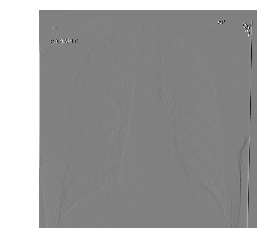

In [32]:
conv2d(dcm_np[5], sobelV_k, 'sobelV')

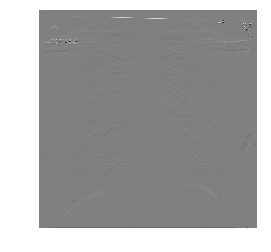

In [33]:
conv2d(dcm_np[5], sobelH_k)

##### Emboss Kernel Output

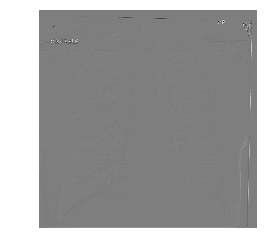

In [34]:
conv2d(dcm_np[5], emboss_k)

##### Sharp Kernel Output

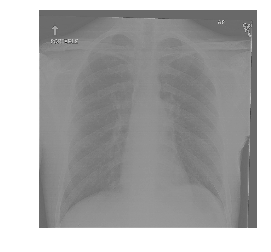

In [56]:
conv2d(dcm_np[5], sharp_k)

##### Gradient Kernel Outputs

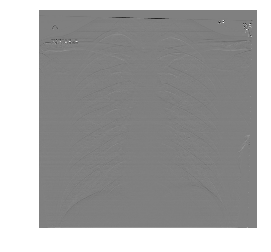

In [57]:
conv2d(dcm_np[5], gradH_k)

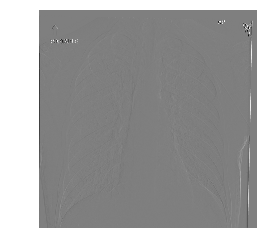

In [58]:
conv2d(dcm_np[5], gradV_k)

##### Unsharpmasking Kernel Output

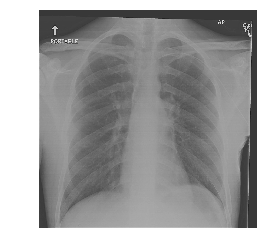

In [59]:
conv2d(dcm_np[5], unsharpmask_k)

##### Box Blur Kernel Output

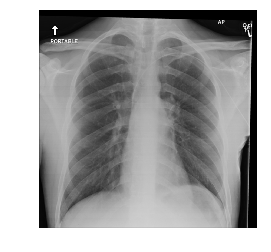

In [60]:
conv2d(dcm_np[5], boxblur_k)

##### Gaussian Blur Kernels

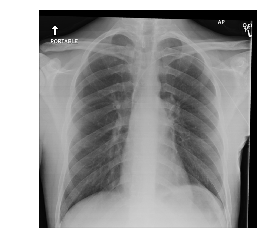

In [61]:
conv2d(dcm_np[5], gauss3_k)

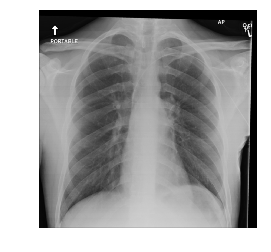

In [62]:
conv2d(dcm_np[5], gauss5_k)

##### Identity Kernel Output

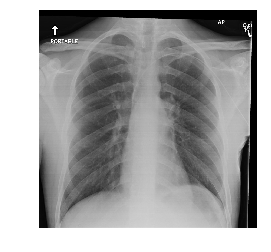

In [63]:
conv2d(dcm_np[5], identity_k)

##### Edge Detection Kernel Output

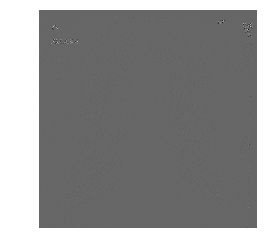

In [64]:
conv2d(dcm_np[5], edge1_k)

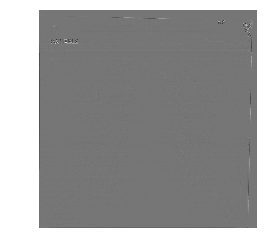

In [65]:
conv2d(dcm_np[5], edge2_k)

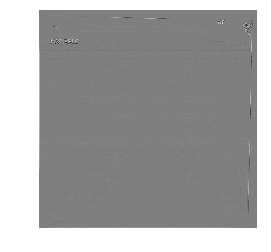

In [66]:
conv2d(dcm_np[5], edge3_k)

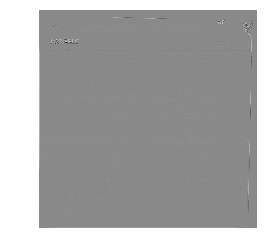

In [67]:
conv2d(dcm_np[5], edgeall_k)

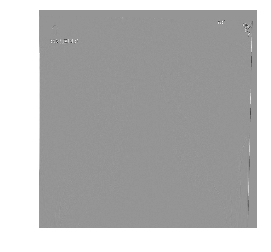

In [68]:
conv2d(dcm_np[5], edgeH_k)

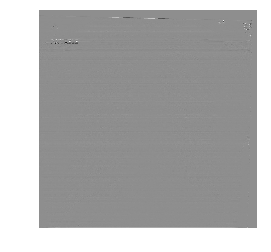

In [69]:
conv2d(dcm_np[5], edgeV_k)